# Intro to scientific computing

To jump into programming with Python, we'll make some **reflection coefficients**.

Before coming into the Notebook, spend some time in an interactive session learning about sequences (strings, lists), and doing basic indexing, slicing, `append()`, `in`, etc. Then you can come in here.

## Lists

In [1]:
layers = [0.23, 0.34, 0.45, 0.25, 0.23, 0.35]

In [2]:
uppers = layers[:-1]
lowers = layers[1:]

In [3]:
rcs = []
for pair in zip(lowers, uppers):
    rc = (pair[1] - pair[0]) / (pair[1] + pair[0])
    rcs.append(rc)

In [4]:
rcs

[-0.1929824561403509,
 -0.1392405063291139,
 0.28571428571428575,
 0.04166666666666665,
 -0.2068965517241379]

In [5]:
[(l-u)/(l+u) for (l,u) in zip(lowers, uppers)]

[0.1929824561403509,
 0.1392405063291139,
 -0.28571428571428575,
 -0.04166666666666665,
 0.2068965517241379]

## Functions

Definition, inputs, side-effects, returning, scope, docstrings

In [6]:
# Exercise
def compute_rc(layers):
    """
    Computes reflection coefficients given
    a list of layer impedances.
    """
    uppers = layers[:-1]
    lowers = layers[1:]
    rcs = []
    for pair in zip(lowers, uppers):
        rc = (pair[1] - pair[0]) / (pair[1] + pair[0])
        rcs.append(rc)
    return rcs

In [7]:
compute_rc(layers)

[-0.1929824561403509,
 -0.1392405063291139,
 0.28571428571428575,
 0.04166666666666665,
 -0.2068965517241379]

Put in a file and import into a new notebook

## Numpy

**Before continuing, do some basic NumPy array stuff in the interpreter.**

Let's make a really big 'log' from random numbers:

In [8]:
import numpy as np  # Just like importing file

In [9]:
biglog = np.random.random(10000000)
%timeit compute_rc(biglog)

1 loop, best of 3: 4.69 s per loop


Note that the log has to be fairly big for the benchmarking to work properly, because otherwise the CPU caches the computation and this skews the results.

Now we can re-write our function using arrays instead of lists.

In [10]:
# Exercise
def compute_rc_vector(layers):
    uppers = layers[:-1]
    lowers = layers[1:]
    return (lowers - uppers) / (uppers + lowers)

In [11]:
%timeit compute_rc_vector(biglog)

10 loops, best of 3: 82.8 ms per loop


60 times faster on my machine!

## Plotting basics

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

Not we can only plot part of `biglog` because it contains too many points for `matplotlib` (and for our screen!). If we really wanted to plot it, we'd have to find a way to upscale it.

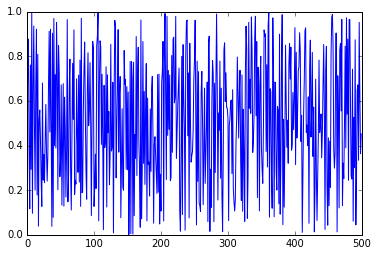

In [13]:
plt.plot(biglog[:500])

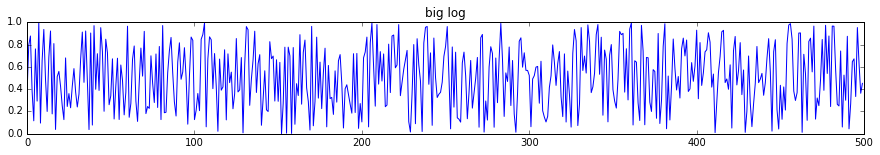

In [14]:
fig = plt.figure(figsize=(15,2))
ax = fig.add_subplot(111)
ax.plot(biglog[:500])
ax.set_title("big log")
plt.show()

<hr />

<div>
<img src="https://avatars1.githubusercontent.com/u/1692321?s=50"><p style="text-align:center">© Agile Geoscience 2016</p>
</div>